## Initialization

In [110]:
from sklearn.neural_network import MLPRegressor
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data generation

In [120]:
np.random.seed(2)
N = 1000
X = np.random.randn(N, 1)
y = X + X**2 + 2*X**3 - 0.5*X**4 + 0.5*np.random.randn(N, 1)
X = np.hstack((X, X**2, X**3, X*4))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
scaler_x, scaler_y = MinMaxScaler().fit(X_train), MinMaxScaler().fit(y_train) 
X_train, X_test = 2 * scaler_x.transform(X_train) - 1, 2 * scaler_x.transform(X_test) - 1
y_train, y_test = 2 * scaler_y.transform(y_train) - 1, 2 * scaler_y.transform(y_test) - 1

### Modeling using sklearn

In [121]:
model = MLPRegressor((10, ), activation = 'tanh', solver = 'adam', max_iter = 100,  learning_rate_init = 0.1)
model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(activation='tanh', hidden_layer_sizes=(10,),
             learning_rate_init=0.1, max_iter=100)

-0.015567561692314229
0.028881191230417942


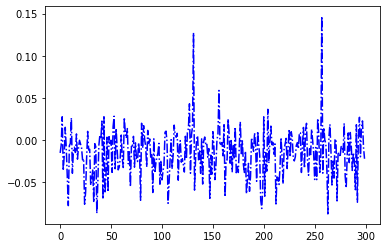

In [122]:
y_pre = model.predict(X_test)
error = y_pre.reshape(-1, 1) - y_test.reshape(-1, 1)
print(np.mean(error))
print(np.std(error))

plt.plot(error, 'b-.')
plt.show()

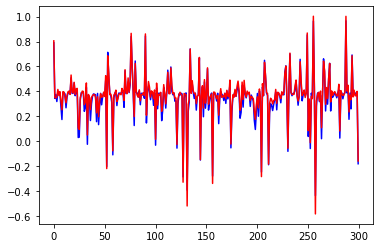

In [123]:
plt.plot(y_pre, 'b')
plt.plot(y_test, 'r')
plt.show()